In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import viz

colors = viz.plotting_style()
lin_colors = colors.values()
plt.style.use('style.mpl')

color_order = ['green', 'blue', 'red', 'purple', 'yellow', 'dark_green', 'dark_blue', 'dark_brown']
lin_colors = [colors[c] for c in color_order]
greys = sns.color_palette('Greys', 6)

In [2]:
colors

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426',
 'dark_blue': '#535D87'}

In [3]:
# Values from eQuilibrator web interface
redox_dict = {
    'H2O/O2': {
        'E0_prime': 0.825,
        'E0_m': 0.780,
        'n_e': 4,
        'pretty_name': '2 H$_2$O/O$_2$ (4 e$^-$)'
    },
    'glucose/CO2': {
        'E0_prime': -0.44,
        'E0_m': -0.477,
        'n_e': 24,
        'pretty_name': 'glucose/CO$_2$ (24 e$^-$)'
    },
    'lactate/pyruvate': {
        'E0_prime': -0.22,
        'E0_m': -0.22,
        'n_e': 2,
        'pretty_name': 'lactate/pyruvate (2 e$^-$)'
    },
    'NADH/NAD+': {
        'E0_prime': -0.343,
        'E0_m': -0.343,
        'n_e': 2,
        'pretty_name': 'NADH/NAD+ (2 e$^-$)'
    },
    'NO3-/N2': {
        'E0_prime': 0.692,
        'E0_m': 0.675,
        'n_e': 10,
        'pretty_name': '2 NO$_3^-$ / N$_2$ (10 e$^-$)'
    },
    'H2/H+': {
        'E0_prime': 0.0,
        'E0_m': 0.0,
        'n_e': 2,
        'pretty_name': 'H$_2$/H$^+$ (2 e$^-$)'
    },
}

redox_df = pd.DataFrame(redox_dict).T
redox_df = redox_df.sort_values('E0_prime', ascending=True)
redox_df

,E0_prime,E0_m,n_e,pretty_name
glucose/CO2,-0.44,-0.477,24,glucose/CO$_2$ (24 e$^-$)
NADH/NAD+,-0.343,-0.343,2,NADH/NAD+ (2 e$^-$)
lactate/pyruvate,-0.22,-0.22,2,lactate/pyruvate (2 e$^-$)
H2/H+,0.0,0.0,2,H$_2$/H$^+$ (2 e$^-$)
NO3-/N2,0.692,0.675,10,2 NO$_3^-$ / N$_2$ (10 e$^-$)
H2O/O2,0.825,0.78,4,2 H$_2$O/O$_2$ (4 e$^-$)


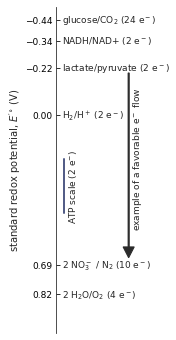

In [4]:
# Make a redox tower from the df 
fig = plt.figure(figsize=(2, 6))
# for each potential, write the pretty name on the plot at that y-position
for i, row in redox_df.iterrows():
    plt.text(0.05, row['E0_prime'], row['pretty_name'], ha='left', va='center', fontsize=9)

# draw an arrow from pyruvate/lactate to NO3-/N2
arrow_params = {'length_includes_head': True, 'shape': 'full', 'head_starts_at_zero': True,
                "fc": greys[-1], "ec": greys[-1], "width": 0.01, "head_width": 0.1, "head_length": 0.05}
plt.arrow(0.65, -0.22, 0.0, 0.85, **arrow_params)
# annotate the arrow "favorable e- flow"
plt.text(0.73, 0.2, "example of a favorable e$^-$ flow",
         ha='center', va='center', fontsize=9, rotation=90)

# scale of ATP hydrolysis at 250 mV -- line with caps at both ends
plt.plot([0.07, 0.07], [0.2, 0.45], color=colors['dark_blue'], lw=2)
plt.text(0.15, 0.325, "ATP scale (2 e$^{-}$)", ha='center', va='center', rotation=90, fontsize=9)

# despine everything except the y-axis
sns.despine(ax=plt.gca(), bottom=True, left=False, right=True, top=True)
# hide the x ticks, invert the y-axis
plt.xticks([], [])
plt.xlim(0,1)
yticks = np.round(redox_df.E0_prime.values.tolist(), 2)
plt.yticks(yticks, fontsize=9)
plt.ylabel("standard redox potential, $E'^{\circ}$ (V)", fontsize=10)
plt.ylim(-0.5, 1.0)
plt.gca().invert_yaxis()

plt.savefig('../output/FigSX_redox_tower.pdf', dpi=300, bbox_inches='tight')
plt.show()